##Part 1 - Overall Product Specifications
**Problem Statement** - The goal of this project is to build a Retrieval-Augmented Generation (RAG) application capable of answering user questions based on a large and complex insurance policy PDF document.

**Solution Strategy** - Build a POC which should solve the following requirements:

Enable intelligent document understanding and question answering.
Allow real-time retrieval of relevant policy clauses.
Utilize local models to ensure privacy and offline functionality.
Support scalable and accurate document querying using semantic search and reranking.


**Data Used** - Life Insurance policy as single pdf file stored in data folder

**Tools used** - LlamaIndex (only for now) has been used due to its powerful query engine, fast data processing using data loaders and directory readers as well as easier and faster implementation using fewer lines of code.

### Part 2 - Solution POC

In this section, we go ahead and actually build a POC of the solution that we proposed in the previous step

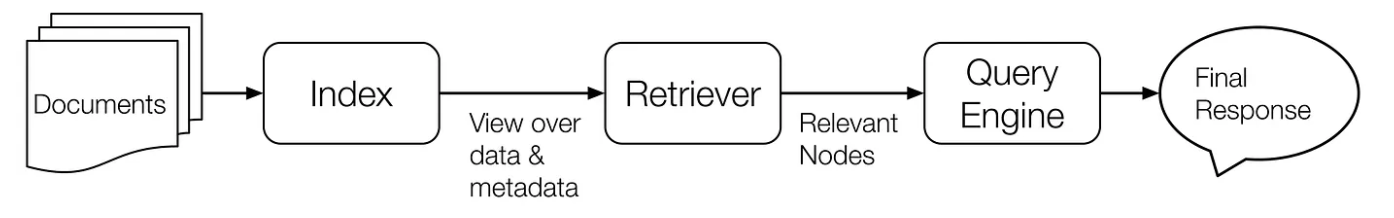

####Step 1 : Import the necessary libraries

In [ ]:
!pip install -U llama-index llama-index-embeddings-huggingface llama-index-llms-huggingface transformers sentence-transformers


In [ ]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.core.node_parser import SimpleNodeParser
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.llms.huggingface import HuggingFaceLLM

import os

####Step 2: Data Loading

In [2]:
documents = SimpleDirectoryReader("data").load_data()

####Step 3 - Building the query engine

In [3]:
embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [13]:

llm = HuggingFaceLLM(
    context_window=2048,
    max_new_tokens=256,
    model_name="tiiuae/falcon-rw-1b",  # lightweight model
    tokenizer_name="tiiuae/falcon-rw-1b",
    device_map="auto",  # automatically use GPU if available
)

In [5]:

parser = SimpleNodeParser.from_defaults()
nodes = parser.get_nodes_from_documents(documents)

In [6]:

index = VectorStoreIndex(nodes, embed_model=embed_model)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [7]:
#  Query the Index Using LLM
query_engine = index.as_query_engine(llm=llm)

In [14]:
response = query_engine.query("tell me about Dependent Life Insurance in short")

# Display Answer
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.



---------------------
page_label: 45
file_path: /content/data/Principal-Sample-Life-Insurance-Policy.pdf

This policy has been updated effective  January 1, 2014 
 
PART III - INDIVIDUAL REQUIREMENTS AND RIGHTS 
GC 6007 Section B - Dependent Life Insurance, Page 3  
 
(1) The Member's Dependent Life Insurance terminates because the Member's Coverage During 
Disability as described in PART IV, Section A, ceases because the Member's Coverage During 
Disability ends and the Member does not return to Active Work within 31 days ; or 
(2) the Member's Dependent Life Insurance terminates because the Member's Accelerated 
Benefits Premium Waiver Period as described in PART IV, Section A, ceases and the 
Member does not qualify for Coverage During Disability. 
 
(3) The Member's Dependent Life Insurance terminates because the Member's Coverage During 
Disability as described in PART IV, Section A, ceases because the Member's Coverage During 
Disability ends and the Member does not return to Ac

In [24]:
response.response

"\n---------------------\npage_label: 45\nfile_path: /content/data/Principal-Sample-Life-Insurance-Policy.pdf\n\nThis policy has been updated effective  January 1, 2014 \n \nPART III - INDIVIDUAL REQUIREMENTS AND RIGHTS \nGC 6007 Section B - Dependent Life Insurance, Page 3  \n \n(1) The Member's Dependent Life Insurance terminates because the Member's Coverage During \nDisability as described in PART IV, Section A, ceases because the Member's Coverage During \nDisability ends and the Member does not return to Active Work within 31 days ; or \n(2) the Member's Dependent Life Insurance terminates because the Member's Accelerated \nBenefits Premium Waiver Period as described in PART IV, Section A, ceases and the \nMember does not qualify for Coverage During Disability. \n \n(3) The Member's Dependent Life Insurance terminates because the Member's Coverage During \nDisability as described in PART IV, Section A, ceases because the Member's Coverage During \nDisability ends and the Member d

In [15]:
response.source_nodes

[NodeWithScore(node=TextNode(id_='6e552a47-7194-445d-bd6b-eb9e8a46ae0d', embedding=None, metadata={'page_label': '44', 'file_name': 'Principal-Sample-Life-Insurance-Policy.pdf', 'file_path': '/content/data/Principal-Sample-Life-Insurance-Policy.pdf', 'file_type': 'application/pdf', 'file_size': 222772, 'creation_date': '2025-08-05', 'last_modified_date': '2025-08-05'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='be4a3db0-cc79-4028-b2d6-53d88406f50f', node_type='4', metadata={'page_label': '44', 'file_name': 'Principal-Sample-Life-Insurance-Policy.pdf', 'file_path': '/content/data/Principal-Sample-Life-Insurance-Policy.pdf', 'file_type': 'application/pdf', 'file_size': 222772, 'creation_date': '2025-08-0

In [16]:
#Extract the file name
response.source_nodes[0].node.metadata['file_name']

'Principal-Sample-Life-Insurance-Policy.pdf'

In [17]:
#Extract the file name and page number
response.source_nodes[0].node.metadata['file_name'] + " page no " + response.source_nodes[0].node.metadata['page_label']

'Principal-Sample-Life-Insurance-Policy.pdf page no 44'

In [18]:
#Extract the score
response.source_nodes[0].score

0.7203223745182378

In [19]:
# Response node text
response.source_nodes[0].node.text

"This policy has been updated effective  January 1, 2014 \n \nPART III - INDIVIDUAL REQUIREMENTS AND RIGHTS \nGC 6011  Section F - Individual Purchase Rights, Page 3  \n \n(4) Premium will be based on the Dependent's age and the standard rate of The Principal \nfor the policy form to be issued. \n \nb. Purchase Qualification \n \nA Dependent will qualify for individual purchase if: \n \n(1) Dependent Life Insurance, or any portion of it, terminates because he or she ceases to \nbe a Dependent as defined in PART I; or because the Member dies, ends Active \nWork, or ceases to be in a class eligible for such insurance; or \n(2) the Dependent spouse's Dependent Life Insurance terminates as described in PART \nIII, Section C; or \n(3) the Dependent spouse's or Civil Union Partner's Dependent Life Insurance terminates \nbecause of divorce or separation or termination of a Civil Union partnership from the \nMember; or \n(4) after the Dependent has been continuously insured for Dependent Life 

####Step 4 - Creating a response Pipeline

In [27]:
## Query response function
def query_response(user_input):
  response = query_engine.query(f"{user_input}")
  file_name = response.source_nodes[0].node.metadata['file_name'] + " page nos " + response.source_nodes[0].node.metadata['page_label'] + "," + response.source_nodes[1].node.metadata['page_label']
  final_response = response.response + '\n Check further at ' + file_name
  return final_response

In [21]:
from IPython.display import display, HTML

In [22]:
def initialize_conv():
  print('Feel free to ask Questions regarding uber 2021 financial report. Type exit once you are done')
  while True:
    user_input = input()
    if user_input.lower() == 'exit':
      print('Exiting the program... bye')
      break
    else:
      response = query_response(user_input)
      display(HTML(f'<p style="font-size:20px">{response}</p>'))

In [28]:
initialize_conv()

Feel free to ask Questions regarding uber 2021 financial report. Type exit once you are done
Tell me about policy in brief


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


KeyboardInterrupt: Interrupted by user

####Step 5 - Build a Testing Pipeline

Here we feed a series of questions to the Q/A bot and store the responses along with the feedback on whether it's accurate or not from the user

In [29]:
questions = ['what are accelerated benefits?',
             "which are the Educational Benefit?",
             'what is the time limit to claim?']

In [33]:
import pandas as pd

feedback_df = pd.DataFrame()

def testing_pipeline(questions):
  test_feedback  = []
  for i in questions:
    print(i)
    print(query_response(i))
    print('\n Please provide your feedback on the response provided by the bot')
    user_input = input()
    page = query_response(i).split()[-1]
    test_feedback.append((i,query_response(i),page,user_input))

  feedback_df = pd.DataFrame(test_feedback, columns =['Question', 'Response', 'Page','Good or Bad'])
  return feedback_df

In [41]:
result_df = testing_pipeline(questions)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


what are accelerated benefits?


---------------------
page_label: 56
file_path: /content/data/Principal-Sample-Life-Insurance-Policy.pdf

This policy has been updated effective  January 1, 2014 
 
 
PART IV - BENEFITS 
GC 6020  Section C - Member Accidental Death and 
Dismemberment Insurance, Page 4 
 
 
Exposure 
 
Exposure to the elements will be presumed to be an injury if: 
 
a. such exposure is due to an accidental bodily injury; and 
 
b. within 365 days after the injury, the Member incurs a loss that is the result of the exposure; 
and 
 
c. this Group Policy would have covered the injury resulting from the accident. 
 
d. this Group Policy will not be terminated if the Member dies as a result of the injury. 
 
e. this Group Policy will not be terminated if the Member is disabled as a result of the injury. 
 
f. this Group Policy will not be terminated if the Member is permanently and totally disabled. 
 
g. this Group Policy will not
 Check further at Principal-Sample-Life-Ins

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


which are the Educational Benefit?

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Check further at Principal-Sample-Life-Insurance-Policy.pdf page nos 57,55

 Please provide your feedback on the response provided by the bot
bad


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


what is the time limit to claim?

---------------------
page_label: 60
file_path: /content/data/Principal-Sample-Life-Insurance-Policy.pdf

This policy has been updated effective  January 1, 2014 
 
This policy has been updated effective  January 1, 2014 
 
PART IV - BENEFITS 
GC 6018  Section D - Claim Procedures, Page 3  
 
Section D - Claim Procedures 
 
Article 5 - Medical Examinations 
 
The Principal may have the Member or Dependent whose loss is the basis for claim, be 
examined by a Physician during the course of a claim.  The Principal will pay for these 
examinations and will choose the Physician to perform them. 
 
Article 6 - Autopsy 
 
If payment for loss of life is claimed, The Principal may require an autopsy.  The Principal will 
pay for any such autopsy. 
 
Article 7 - Legal Action 
 
Legal action to recover benefits under this Group Policy may not be started earlier than 90 days 
after required proof of loss has been filed and before the appeal procedures have been ex

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [42]:
result_df

,Question,Response,Page,Good or Bad
0,what are accelerated benefits?,\n\n---------------------\npage_label: 56\nfil...,"52,55",good
1,which are the Educational Benefit?,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \...,"57,55",bad
2,what is the time limit to claim?,\n---------------------\npage_label: 60\nfile_...,"62,61",good


In [43]:
result_df['Response']

,Response
0,\n\n---------------------\npage_label: 56\nfil...
1,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \...
2,\n---------------------\npage_label: 60\nfile_...


In [50]:
# Clean the 'Response' column
df_cleaned = result_df.copy()
df_cleaned["Response"] = df_cleaned["Response"].str.replace(r'\n|---+', '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip().str.replace('file_path: /content/data/Principal-Sample-Life-Insurance-Policy.pdf', ' ')

# View cleaned DataFrame
print(df_cleaned)

                             Question  \
0      what are accelerated benefits?   
1  which are the Educational Benefit?   
2    what is the time limit to claim?   

                                            Response   Page Good or Bad  
0  page_label: 56 This policy has been updated ef...  52,55        good  
1  Check further at Principal-Sample-Life-Insuran...  57,55         bad  
2  page_label: 60 This policy has been updated ef...  62,61        good  


In [51]:
df_cleaned

,Question,Response,Page,Good or Bad
0,what are accelerated benefits?,page_label: 56 This policy has been updated ef...,"52,55",good
1,which are the Educational Benefit?,Check further at Principal-Sample-Life-Insuran...,"57,55",bad
2,what is the time limit to claim?,page_label: 60 This policy has been updated ef...,"62,61",good


In [54]:
print(df_cleaned['Response'][2])

page_label: 60 This policy has been updated effective January 1, 2014 This policy has been updated effective January 1, 2014 PART IV - BENEFITS GC 6018 Section D - Claim Procedures, Page 3 Section D - Claim Procedures Article 5 - Medical Examinations The Principal may have the Member or Dependent whose loss is the basis for claim, be examined by a Physician during the course of a claim. The Principal will pay for these examinations and will choose the Physician to perform them. Article 6 - Autopsy If payment for loss of life is claimed, The Principal may require an autopsy. The Principal will pay for any such autopsy. Article 7 - Legal Action Legal action to recover benefits under this Group Policy may not be started earlier than 90 days after required proof of loss has been filed and before the appeal procedures have been exhausted. Check further at Principal-Sample-Life-Insurance-Policy.pdf page nos 62,61


# Evalute response using RAGAS

In [55]:
!pip install -U ragas datasets evaluate accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.4 MB/s eta 0:00:00


In [66]:
!pip install ragas[transformers]

In [56]:
from ragas.metrics import faithfulness, answer_relevancy, context_precision, context_recall
from ragas import evaluate
from datasets import Dataset

In [58]:
query = "what is the time limit to claim?"
response = query_engine.query(query)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [73]:
from datasets import Dataset

ragas_data = Dataset.from_dict({
    "question": [query],
    "answer": [str(response)],
    "contexts": [[node.text for node in response.source_nodes]],
    "reference": ["Alice Johnson"]   # required for answer_relevancy
})


In [74]:
response.response

'\n---------------------\npage_label: 60\nfile_path: /content/data/Principal-Sample-Life-Insurance-Policy.pdf\n\nThis policy has been updated effective  January 1, 2014 \n \nThis policy has been updated effective  January 1, 2014 \n \nPART IV - BENEFITS \nGC 6018  Section D - Claim Procedures, Page 3  \n \nSection D - Claim Procedures \n \nArticle 5 - Medical Examinations \n \nThe Principal may have the Member or Dependent whose loss is the basis for claim, be \nexamined by a Physician during the course of a claim.  The Principal will pay for these \nexaminations and will choose the Physician to perform them. \n \nArticle 6 - Autopsy \n \nIf payment for loss of life is claimed, The Principal may require an autopsy.  The Principal will \npay for any such autopsy. \n \nArticle 7 - Legal Action \n \nLegal action to recover benefits under this Group Policy may not be started earlier than 90 days \nafter required proof of loss has been filed and before the appeal procedures have been exhaus

In [75]:
# Run evaluation
results = evaluate(
    ragas_data,
    metrics=[faithfulness, answer_relevancy, context_precision, context_recall]
)

OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

In [76]:
from langchain_community.llms import HuggingFacePipeline
from langchain_community.embeddings import HuggingFaceEmbeddings
from transformers import pipeline

# Embedding model
embedding_model = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

# LLM for evaluation
llm_pipeline = pipeline("text2text-generation", model="google/flan-t5-base", max_new_tokens=512)
llm = HuggingFacePipeline(pipeline=llm_pipeline)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0
/tmp/ipython-input-2359235665.py:12: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=llm_pipeline)


In [77]:
from datasets import Dataset

ragas_data = Dataset.from_dict({
    "question": [query],
    "answer": [str(response)],
    "contexts": [[node.text for node in response.source_nodes]],
    "reference": ["Alice Johnson"]   # required for answer_relevancy
})

In [78]:
results = evaluate(

                   ragas_data,
    metrics=[
        answer_relevancy,
        faithfulness,
        context_precision,
        context_recall
    ],
    llm=llm,
    embeddings=embed_model
)

Evaluating:   0%|          | 0/4 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (776 > 512). Running this sequence through the model will result in indexing errors
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
ERROR:ragas.executor:Exception raised in Job[3]: OutOfMemoryError(CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 2.12 MiB is free. Process 9888 has 14.74 GiB memory in use. Of the allocated memory 14.36 GiB is allocated by PyTorch, and 209.95 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables))
ERROR:ragas.executor:Exception raised in Job[2]: OutOfMemoryError(CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a 

In [79]:
print(results)

{'answer_relevancy': nan, 'faithfulness': nan, 'context_precision': nan, 'context_recall': nan}
